In [2]:
import torch as t
import torch_geometric as pyg
import dgl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import numpy as np
from torch_geometric.data import Data
from gnns import GAE
from training import train_edge_predictor
from graph_utils import adj_to_edge_index, edge_index_to_adj

/home/lrudl/miniconda3/envs/pyg2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
dataset = dgl.data.BAShapeDataset()
src, dst = dataset[0].edges()
edge_index = t.stack([src, dst], dim=0)
x = dataset[0].ndata["feat"]
labels = dataset[0].ndata["label"]

Done loading data from cached files.


In [5]:
train_graphs = [
    Data(x=x, edge_index=edge_index)
]

In [6]:
gae = GAE(1, 64)

100%|██████████| 1000/1000 [00:03<00:00, 272.62it/s]


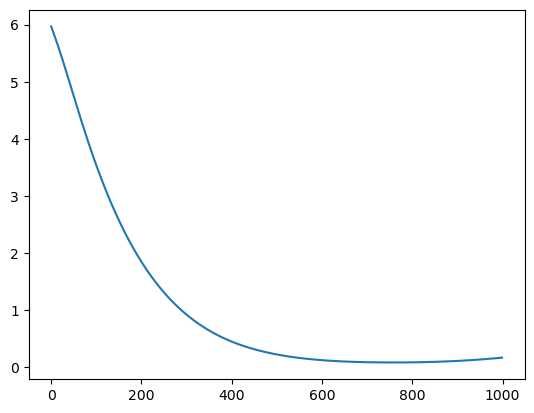

In [7]:
losses = train_edge_predictor(gae, train_graphs, 1000, lr=0.0001)
plt.plot(losses)

In [8]:
adj_pred = gae(train_graphs[0].x, train_graphs[0].edge_index).detach()
adj_pred

tensor([[0.4087, 0.4087, 0.4087,  ..., 0.3858, 0.3900, 0.4036],
        [0.4087, 0.4087, 0.4087,  ..., 0.3858, 0.3900, 0.4036],
        [0.4087, 0.4087, 0.4087,  ..., 0.3858, 0.3900, 0.4036],
        ...,
        [0.3858, 0.3858, 0.3858,  ..., 0.4272, 0.4197, 0.3950],
        [0.3900, 0.3900, 0.3900,  ..., 0.4197, 0.4142, 0.3966],
        [0.4036, 0.4036, 0.4036,  ..., 0.3950, 0.3966, 0.4017]])

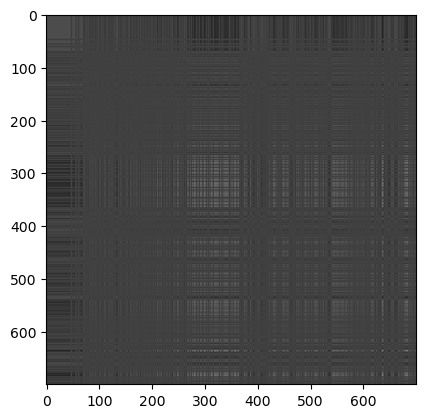

In [9]:
plt.imshow(adj_pred.numpy(), cmap="gray")

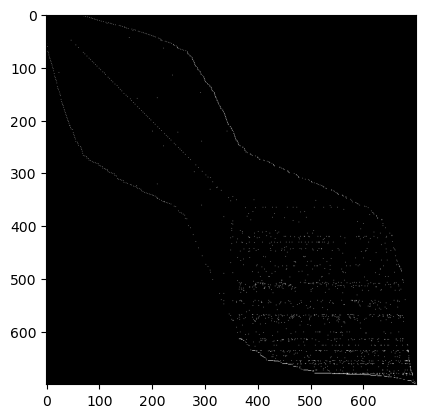

In [13]:
plt.imshow(edge_index_to_adj(train_graphs[0].edge_index).numpy(), cmap="gray")